In [4]:
from linkedin_api import Linkedin
from selenium import webdriver
import time
import json
import pandas as pd
from pandas import datetime
import numpy as np
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import os
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import re
import nltk
import string
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

pd.set_option('display.max_colwidth', None)

<ipython-input-4-b6a7ec156ed1>:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\18477\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\18477\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\18477\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
wd = webdriver.Chrome(ChromeDriverManager().install())

[WDM] - Downloading:  56%|█████▌    | 3.54M/6.30M [00:00<00:00, 6.03MB/s]

In [6]:
time.sleep(3)
linkedin_email = 'youremail@gmail.com'
linkedin_pw = 'gobears'
api = Linkedin(linkedin_email, linkedin_pw)

[WDM] - Downloading: 100%|██████████| 6.30M/6.30M [00:04<00:00, 1.34MB/s]


In [8]:
time.sleep(5)
jobs = api.search_jobs(
    keywords = 'data scientist',
    job_type = 'F',
    experience = '2|3|4',
    distance = 25,
    limit = -1,
    listed_at = 604800, #1week
    location_name = 'Boston, Massachusetts, United States'
)

In [9]:
job_list = []

#removed all remote jobs and data engineer jobs (my preference)
for i in range(len(jobs)):
    if (jobs[i]['workRemoteAllowed'] == False) & ('Data Engineer' not in jobs[i]['title']):
        a = jobs[i]['dashEntityUrn']
        ix = 0
        for ii in range(len(a)-1,0,-1):
            if a[ii] == ':':
                ix = ii+1
                break

        result = a[ix:]
        job_list.append(result)
        
df = pd.DataFrame({'job_id':job_list})
df.shape

(633, 1)

In [10]:
def get_job_desc(job_id,ix):
    time.sleep(3)
    print(ix)
    url = 'https://www.linkedin.com/jobs/view/' + job_id
    try:
        wd.get(url)
        desc = wd.find_element(By.CLASS_NAME,'show-more-less-html__markup').get_attribute('innerText')
        title = wd.find_element(By.CLASS_NAME,'topcard__title').get_attribute('innerText')
        company = wd.find_element(By.CLASS_NAME,'topcard__org-name-link').get_attribute('innerText').strip()
        return pd.Series([desc,title,company])
    except:
        return pd.Series(['','',''])

In [11]:
job_meta = df.apply(lambda x: get_job_desc(x['job_id'],x.name), axis = 1)
job_meta.columns = ['desc_raw','title','company']
df = pd.concat([df,job_meta],axis=1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [12]:
df.head()

job_id  \
0  3610756366   
1  3628079291   
2  3584824174   
3  3305892542   
4  3630226352   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [13]:
ps = PorterStemmer()

def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(ps.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

def preprocess_text(text):
    try:
        # Convert to lowercase
        text = text.lower()

        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))

        # Tokenize words
        words = word_tokenize(text)

        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        words = [word for word in words if word not in stop_words]

        # Lemmatize words
        lemmatizer = WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word) for word in words]

        # Reconstruct the text
        preprocessed_text = ' '.join(words)

        # remove numbers
        preprocessed_text = ''.join([i for i in preprocessed_text if not i.isdigit()])

        preprocessed_text=stemSentence(preprocessed_text)

        return preprocessed_text
    except:
        return np.NaN

In [15]:
import docx2txt
resume_loc = r'C:\Users\18477\OneDrive\Desktop\Upwork\Jack S Mengel - Resume.docx'
text = docx2txt.process(resume_loc)

df = pd.concat(
    [
        df,
        pd.DataFrame({
            'job_id':[1],
            'desc_raw':text,
            'title':'fun guy',
            'company':'prestige worldwide'
        })
    ],
    axis=0
)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords

df['desc'] = df['desc_raw'].apply(preprocess_text)
df.dropna(inplace=True)

vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(df['desc'])
bow_df = pd.DataFrame(bow.toarray(),columns=vectorizer.get_feature_names()).reset_index(drop = True)
df=df.reset_index(drop=True)
bow_df = bow_df.select_dtypes(exclude=['object'])
cols = bow_df.columns
bow_df['job_id'] = df['job_id']
bow_df['position_fill'] = df['title']
bow_df['company_fill'] = df['company']

df['job_id'] = df['job_id'].astype(float)
bow_df['job_id'] = bow_df['job_id'].astype(float)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [17]:
A = bow_df.loc[bow_df['job_id'] == 1,cols]
from sklearn.metrics.pairwise import cosine_similarity

def get_similarity(job_id):
    try:
        B = bow_df.loc[bow_df['job_id'] == job_id,cols]
        return cosine_similarity(A,B)[0][0]
    except:
        return 0

In [18]:
df['similarity'] = df.apply(lambda x: get_similarity(x['job_id']), axis = 1)
df['url'] = 'https://www.linkedin.com/jobs/view/' + df['job_id']

(array([ 29.,  82., 341., 118.,  57.,   6.,   0.,   0.,   0.,   1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

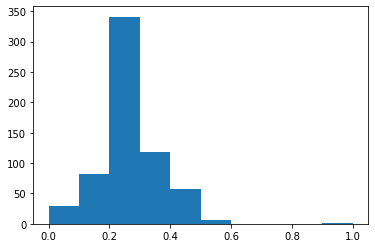

In [19]:
import matplotlib.pyplot as plt
plt.hist(df['similarity'])

In [20]:
#Write results to disc
df[['job_id','url','similarity','company','title']].sort_values(by='similarity',ascending=False).to_csv(r'C:\Users\18477\OneDrive\Desktop\LinkedIn\job_desc_' + str(datetime.now().strftime('%Y_%m_%d_%H_%M_%S')) + '.csv', index = False)